In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [57]:
#入力と出力の指定
im_rows = 28 #画像の縦ピクセルサイズ
im_cols = 28 #画像の横ピクセルサイズ
im_color =1 #画像の色空間。グレイスケール
in_shape = (im_rows,im_cols,im_color)
out_size = 10

In [58]:
#MNISTのデータ読み込み
(X_train, y_train),(X_test, y_test) = mnist.load_data()
#読み込んだデータを三次元配列に変換
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32')/255
#ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [59]:
#CNNモデル構造を定義
model = Sequential()
model.add(Conv2D(32,
                kernel_size = (3, 3),
                activation = 'relu',
                input_shape = in_shape))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation = 'softmax'))

In [60]:
#モデルをコンパイル
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(),
    metrics = ['accuracy'])

In [61]:
#学習を実行
hist = model.fit(X_train, y_train,
                batch_size = 128,
                epochs = 12,
                verbose = 1)

Epoch 1/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2188 - accuracy: 0.9342
Epoch 2/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0810 - accuracy: 0.9757
Epoch 3/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0630 - accuracy: 0.9816
Epoch 4/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0559 - accuracy: 0.9838
Epoch 5/12
60000/60000 [==============================] - 60s 995us/step - loss: 0.0495 - accuracy: 0.9857
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0468 - accuracy: 0.9865
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0443 - accuracy: 0.9871
Epoch 8/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0454 - accuracy: 0.9870
Epoch 9/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0464 - accuracy: 0.9873
Epoch 10/12
60000/60000 [============================

In [62]:
#モデルを評価
score = model.evaluate(X_test, y_test, verbose = 1)
print('正解率＝',score[1], 'loss=',score[0])

10000/10000 [==============================] - 4s 419us/step
正解率＝ 0.9897000193595886 loss= 0.0344372431621141


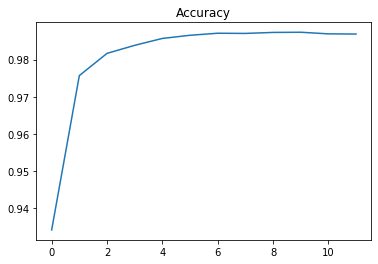

In [63]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
plt.show()